In [12]:
from helper import *

In [17]:
chennai_outline = gpd.read_file("https://raw.githubusercontent.com/gok03/eo-learn-5p-support/master/chennai.geojson")
delhi_outline = gpd.read_file("https://raw.githubusercontent.com/gok03/eo-learn-5p-support/master/delhi.geojson")
hyderbad_outline = gpd.read_file("https://raw.githubusercontent.com/gok03/eo-learn-5p-support/master/hyderabad.geojson")
kolkata_outline = gpd.read_file("https://raw.githubusercontent.com/gok03/eo-learn-5p-support/master/kolkata.geojson")
mumbai_outline = gpd.read_file("https://raw.githubusercontent.com/gok03/eo-learn-5p-support/master/mumbai.geojson")
bangalore_outline = gpd.read_file("https://raw.githubusercontent.com/gok03/eo-learn-5p-support/master/bangalore.geojson")

In [22]:
outline_bbox = get_bbox(chennai_outline)

In [23]:
patch = {}
patch["chennai"] = EOPatch.load("patch/patches-chennai-data")
patch["delhi"] = EOPatch.load("patch/patches-delhi-data")
patch["hyderabad"] = EOPatch.load("patch/patches-hyderabad-data")
patch["kolkata"] = EOPatch.load("patch/patches-kolkata-data")
patch["mumbai"] = EOPatch.load("patch/patches-mumbai-data")
patch["bangalore"] = EOPatch.load("patch/patches-bangalore-data")

In [53]:
current_city = "chennai"

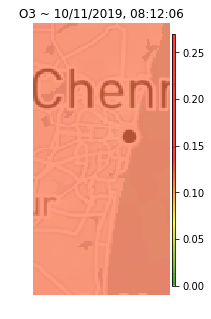

In [54]:
plot_with_data(patch[current_city],"O3",outline_bbox,-1,5)

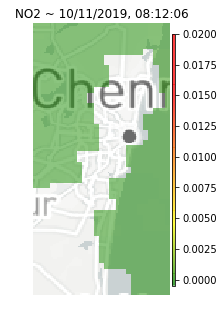

In [45]:
plot_with_data(patch[current_city],"NO2",outline_bbox,-1,5)

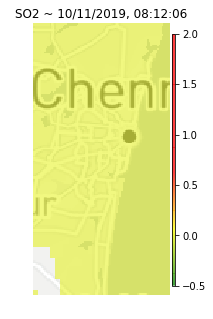

In [47]:
plot_with_data(patch[current_city],"SO2",outline_bbox,-1,5)

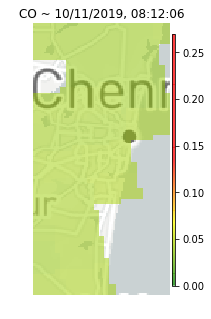

In [48]:
plot_with_data(patch[current_city],"CO",outline_bbox,-1,5)

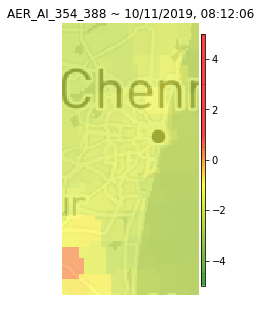

In [49]:
plot_with_data(patch[current_city],"AER_AI_354_388",outline_bbox,-1,5)

In [55]:
def create_gif_for_patch(patch,outline_bbox,i):
    components = ["O3", "SO2", "NO2", "CO", "AER_AI_354_388"]
    if not os.path.exists("export_data/"+i+"/"):
        os.makedirs("export_data/"+i+"/")
        os.makedirs("export_data/"+i+"/gif/")
    for j in components:
        if not os.path.exists("export_data/"+i+"/"):
            os.makedirs("export_data/"+i+"/")
        files = []
        for k in range(len(patch.timestamp)):
            if not os.path.exists("export_data/"+i+"/"+j+"/"):
                os.makedirs("export_data/"+i+"/"+j+"/")
            path = "export_data/"+i+"/"+j+"/"+str(k)+".png"
            file = plot_with_data_save(patch,j,outline_bbox,k,5,path)
            files+= [file]
        images = []
        for filename in files:
            images.append(imageio.imread(filename))
        imageio.mimsave("export_data/"+str(i)+"/gif/"+j+".gif", images,duration=0.5)
    return("Done!")

In [ ]:
create_gif_for_patch(patch["chennai"],outline_bbox,current_city)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
